In [1]:
%pwd

'/Users/David/Dropbox/Apuntes/Máster/Asignaturas/Stellar astrophysics/Project'

In [2]:
import numpy as np
import pandas as pd
import generate_models as gm
import read_data as rd
import cluster as clus
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit as curve_fit
from matplotlib.ticker import ScalarFormatter

In [3]:
# read the initial parameters
parameters = pd.read_csv('./output_cluster/great_initial.csv').values.tolist()

In [4]:
mass = [model[0] for model in parameters]
radius = [model[5] for model in parameters]
Teff = [model[7] for model in parameters]
L = [model[8] for model in parameters]
estimated_lifetime = [model[10] for model in parameters]

Text(0, 0.5, 'Number of stars')

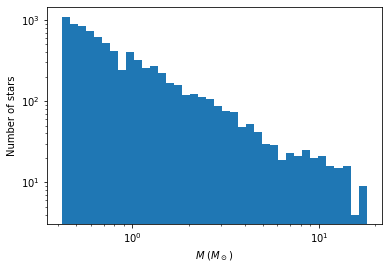

In [18]:
# mass histogram
bins=np.logspace(np.log10(min(mass)),np.log10(max(mass)),39)
plt.hist(mass,bins)
ax=plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel('$M$ ($M_\odot$)')
plt.ylabel('Number of stars')
#plt.savefig('./cluster_plots/initial/mhist.eps')

In [6]:
# total luminosity
luminosity = clus.cluster_luminosity(parameters)
print('Initial luminosity: {:0.0f} solar luminosities'.format(luminosity))

Initial luminosity: 1613431 solar luminosities


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


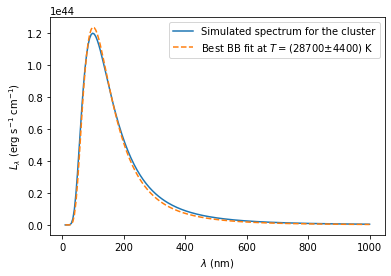

In [198]:
# spectrum (linear scale)
def spectrumfit(lamb, T,A):
    return A*clus.planck_function(T, lamb)
lamb, spectrum = clus.cluster_spectrum(parameters,lambdamin=10,lambdamax=1000)
plt.plot(lamb, spectrum)
model=curve_fit(spectrumfit, lamb/10**9, spectrum,p0=[2.9e4,1.42e26])
Teffclus = model[0][0]
Aclus = model[0][1]
eTeffclus = model[1][0,0]
eAclus = model[1][1,1]
plt.plot(lamb,Aclus*clus.planck_function(Teffclus,lamb/10**9),'--')
plt.legend(['Simulated spectrum for the cluster','Best BB fit at $T=(${0:2.0f}$\pm${1:2.0f}) K'.format(round(Teffclus,-int(round(np.log10(eTeffclus)))+2), round(eTeffclus,-int(round(np.log10(eTeffclus)))+2))])
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('$L_\lambda$ (erg s$^{-1}$ cm$^{-1}$)')
#plt.savefig('./cluster_plots/initial/spectrum.eps')

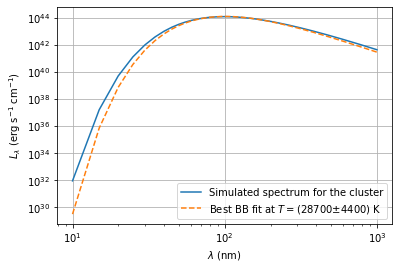

In [202]:
# spectrum (loglog scale)
def spectrumfit(lamb, T,A):
    return A*clus.planck_function(T, lamb)
lamb, spectrum = clus.cluster_spectrum(parameters,lambdamin=10,lambdamax=1000)
plt.plot(lamb, spectrum)
model=curve_fit(spectrumfit, lamb/10**9, spectrum,p0=[2.9e4,1.42e26])
Teffclus = model[0][0]
Aclus = model[0][1]
eTeffclus = model[1][0,0]
eAclus = model[1][1,1]
plt.plot(lamb,Aclus*clus.planck_function(Teffclus,lamb/10**9),'--')
plt.legend(['Simulated spectrum for the cluster','Best BB fit at $T=(${0:2.0f}$\pm${1:2.0f}) K'.format(round(Teffclus,-int(round(np.log10(eTeffclus)))+2), round(eTeffclus,-int(round(np.log10(eTeffclus)))+2))])
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('$L_\lambda$ (erg s$^{-1}$ cm$^{-1}$)')
ax=plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
#plt.savefig('./cluster_plots/initial/spectrum_loglog.eps')

(0.01479006233275773, 66013.07990570154)

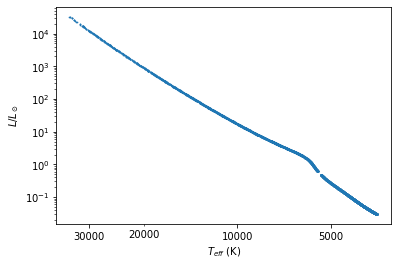

In [203]:
# hrd
plt.scatter(Teff, L, s=0.5)
ax=plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
ax.invert_xaxis()
plt.xlabel('$T_{eff}$ (K)')
plt.ylabel('$L/L_\odot$')
plt.xticks([30000,10000,5000])
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_minor_locator(plt.MultipleLocator(10000))
ax.xaxis.set_minor_formatter(ScalarFormatter())
ax.set_xlim([max(Teff)*1.1,min(Teff)*0.9])
ax.set_ylim([min(L)*0.5, max(L)*2])
#plt.savefig('./cluster_plots/initial/hrd.eps')

### Let's include time evolution (naive version)

In [239]:
#just a check
-len(clus.kill_stars(parameters,4e6)) + len(parameters)

0

In [11]:
len(parameters)

8241

In [137]:
t = 100e6

In [138]:
newparameters = clus.kill_stars(parameters,t)
newmass = [model[0] for model in newparameters]
newradius = [model[5] for model in newparameters]
newTeff = [model[7] for model in newparameters]
newL = [model[8] for model in newparameters]
newestimated_lifetime = [model[10] for model in newparameters]

Text(0.5, 1.0, '$\\Delta t$ = 10000 Myr')

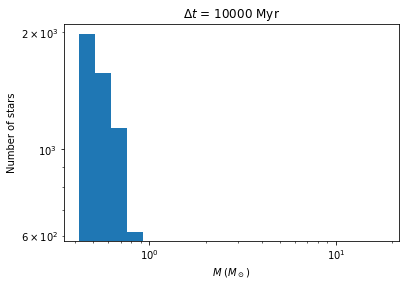

In [266]:
# mass histogram
bins=np.logspace(np.log10(min(mass)),np.log10(max(mass)),20)
plt.hist(newmass,bins)
ax=plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel('$M$ ($M_\odot$)')
plt.ylabel('Number of stars')
plt.title('$\Delta t$ = {:.0f} Myr'.format(t/10**6))

In [140]:
# total luminosity
newluminosity = clus.cluster_luminosity(newparameters)
print('Luminosity at 100 Myr: {:0.0f} solar luminosities'.format(newluminosity))

Luminosity at 100 Myr: 73341 solar luminosities


Text(0.5, 1.0, '$\\Delta t$ = 100 Myr')

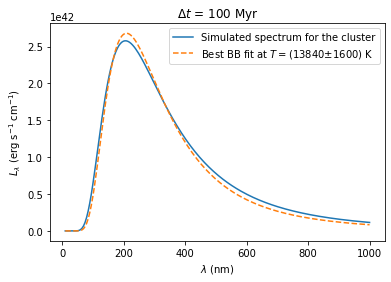

In [213]:
lamb, newspectrum = clus.cluster_spectrum(newparameters,lambdamin=10,lambdamax=1000)
plt.plot(lamb, newspectrum)
newmodel=curve_fit(spectrumfit, lamb/10**9, newspectrum,p0=[2.9e4,1.42e26])
newTeffclus = newmodel[0][0]
newAclus = newmodel[0][1]
neweTeffclus = newmodel[1][0,0]
neweAclus = newmodel[1][1,1]
plt.plot(lamb,newAclus*clus.planck_function(newTeffclus,lamb/10**9),'--')
plt.legend(['Simulated spectrum for the cluster','Best BB fit at $T=(${0:2.0f}$\pm${1:2.0f}) K'.format(round(newTeffclus,-int(round(np.log10(neweTeffclus)))+2), round(neweTeffclus,-int(round(np.log10(neweTeffclus)))+2))])
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('$L_\lambda$ (erg s$^{-1}$ cm$^{-1}$)')
plt.title('$\Delta t$ = {:.0f} Myr'.format(t/10**6))

Text(0.5, 1.0, '$\\Delta t$ = 100 Myr')

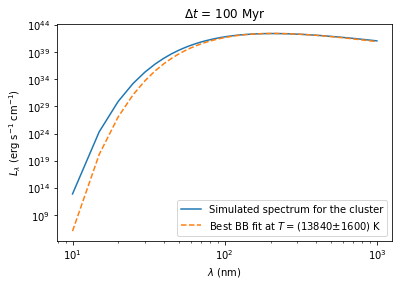

In [74]:
lamb, newspectrum = clus.cluster_spectrum(newparameters,lambdamin=10,lambdamax=1000)
plt.plot(lamb, newspectrum)
newmodel=curve_fit(spectrumfit, lamb/10**9, newspectrum,p0=[2.9e4,1.42e26])
newTeffclus = newmodel[0][0]
newAclus = newmodel[0][1]
neweTeffclus = newmodel[1][0,0]
neweAclus = newmodel[1][1,1]
plt.plot(lamb,newAclus*clus.planck_function(newTeffclus,lamb/10**9),'--')
plt.legend(['Simulated spectrum for the cluster','Best BB fit at $T=(${0:2.0f}$\pm${1:2.0f}) K'.format(round(newTeffclus,-int(round(np.log10(neweTeffclus)))+2), round(neweTeffclus,-int(round(np.log10(neweTeffclus)))+2))])
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('$L_\lambda$ (erg s$^{-1}$ cm$^{-1}$)')
ax=plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.title('$\Delta t$ = {:.0f} Myr'.format(t/10**6))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


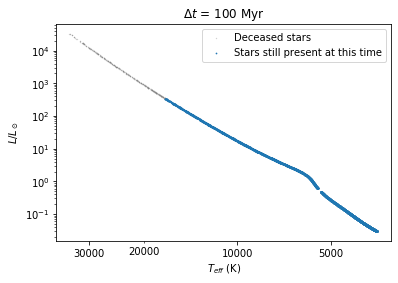

In [89]:
# hrd
plt.scatter(Teff, L, c=(0.5,0.5,0.5,0.5), s=0.1)
plt.scatter(newTeff, newL, s=0.5)
ax=plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
ax.invert_xaxis()
plt.xlabel('$T_{eff}$ (K)')
plt.ylabel('$L/L_\odot$')
plt.title('')
plt.xticks([30000,10000,5000])
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_minor_locator(plt.MultipleLocator(10000))
ax.xaxis.set_minor_formatter(ScalarFormatter())
plt.title('$\Delta t$ = {:.0f} Myr'.format(t/10**6))
ax.set_xlim([max(Teff)*1.1,min(Teff)*0.9])
ax.set_ylim([min(L)*0.5, max(L)*2])
ax.legend(['Deceased stars','Stars still present at this time'])

In [246]:
np.logspace(1,5,10)

array([1.00000000e+01, 2.78255940e+01, 7.74263683e+01, 2.15443469e+02,
       5.99484250e+02, 1.66810054e+03, 4.64158883e+03, 1.29154967e+04,
       3.59381366e+04, 1.00000000e+05])

In [247]:
luminosity_vector = []
time_vector = np.logspace(6,10,200)
for t in time_vector:
    print(t/1e6)
    newparameters = clus.kill_stars(parameters,t)
    luminosity_vector.append(clus.cluster_luminosity(newparameters))  

1.0
1.0473708979594487
1.096985797892384
1.1489510001873084
1.2033778407775904
1.2603829296797273
1.3200884008314167
1.3826221737646562
1.448118227674533
1.516716888470924
1.5885651294280527
1.6638168860761273
1.7426333860096508
1.8251834943190424
1.9116440753857038
2.0022003718155843
2.097046401323231
2.196385372416547
2.3004301197729164
2.409403560239527
2.523539170434766
2.643081486974103
2.768286630392067
2.8994228538828755
3.0367711180354604
3.180625692794119
3.33129478793467
3.489101213406774
3.6543830709572545
3.827494478516315
4.008806328898465
4.198707084443906
4.397603609302721
4.605922041145104
4.824108704165374
5.05263106533568
5.291978735958437
5.542664520663107
5.805225516094896
6.080224261649427
6.3682499447185865
6.6699196630301145
6.9858797467852485
7.316807143427193
7.663410868007462
8.026433522257173
8.406652885618316
8.804883581643464
9.221978823334322
9.65883224115871
10.11637979766207
10.595601792776149
11.097524964120721
11.623224686798519
12.17382727739662
12.75

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


6368249.944718586

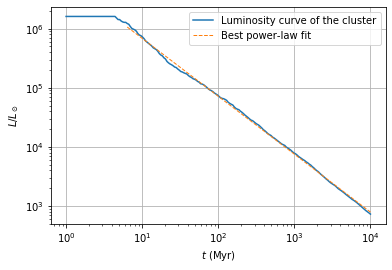

In [260]:
def linear(x,a,b):
    return a*x + b
startpositionfit=40
a = curve_fit(linear, np.log10(time_vector)[startpositionfit:], np.log10(luminosity_vector)[startpositionfit:])
h1=plt.loglog(time_vector/1e6, luminosity_vector) 
h2=plt.loglog(time_vector[startpositionfit:]/1e6, 10**(linear(np.log10(time_vector[startpositionfit:]),a[0][0],a[0][1])),'--',linewidth=1)
plt.xlabel('$t$ (Myr)')
plt.ylabel('$L/L_\odot$')
plt.legend(['Luminosity curve of the cluster','Best power-law fit'])
plt.grid()
plt.savefig('./cluster_plots/Lvst_fit_2.eps')
time_vector[40]

In [241]:
tmin = 4e6
tmax = 1e10
nimages = 100
step = (tmax/tmin)**(1/nimages)

for i in range(nimages):
    print('Running timestep {} of {}'.format(i+1,nimages))
    t = tmin*step**i
    newparameters = clus.kill_stars(parameters,t)
    newmass = [model[0] for model in newparameters]
    newradius = [model[5] for model in newparameters]
    newTeff = [model[7] for model in newparameters]
    newL = [model[8] for model in newparameters]
    newestimated_lifetime = [model[10] for model in newparameters]
    
    bins=np.logspace(np.log10(min(mass)),np.log10(max(mass)),20)
    plt.hist(newmass,bins)
    ax=plt.gca()
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylim([1,2500])
    plt.xlabel('$M$ ($M_\odot$)')
    plt.ylabel('Number of stars')
    plt.title('$\Delta t$ = {:.0f} Myr'.format(t/10**6))
    plt.savefig('/Users/David/Desktop/Evolution/mhist/mhist_{:03.0f}.eps'.format(i+1))
    plt.clf()
    
    lamb, newspectrum = clus.cluster_spectrum(newparameters,lambdamin=10,lambdamax=1000)
    plt.plot(lamb, newspectrum)
    newmodel=curve_fit(spectrumfit, lamb/10**9, newspectrum,p0=[2.9e4,1.42e26])
    newTeffclus = newmodel[0][0]
    newAclus = newmodel[0][1]
    neweTeffclus = newmodel[1][0,0]
    neweAclus = newmodel[1][1,1]
    plt.plot(lamb,newAclus*clus.planck_function(newTeffclus,lamb/10**9),'--')
    plt.legend(['Simulated spectrum for the cluster','Best BB fit at $T=(${0:2.0f}$\pm${1:2.0f}) K'.format(round(newTeffclus,-int(round(np.log10(neweTeffclus)))+2), round(neweTeffclus,-int(round(np.log10(neweTeffclus)))+2))])
    plt.xlabel('$\lambda$ (nm)')
    plt.ylabel('$L_\lambda$ (erg s$^{-1}$ cm$^{-1}$)')
    plt.title('$\Delta t$ = {:.0f} Myr'.format(t/10**6))
    #plt.savefig('/Users/David/Desktop/Evolution/spectrum/spectrum_{:03.0f}.eps'.format(i+1))
    plt.clf()
    
    plt.plot(lamb, newspectrum)
    plt.plot(lamb,newAclus*clus.planck_function(newTeffclus,lamb/10**9),'--')
    plt.legend(['Simulated spectrum for the cluster','Best BB fit at $T=(${0:2.0f}$\pm${1:2.0f}) K'.format(round(newTeffclus,-int(round(np.log10(neweTeffclus)))+2), round(neweTeffclus,-int(round(np.log10(neweTeffclus)))+2))])
    plt.xlabel('$\lambda$ (nm)')
    plt.ylabel('$L_\lambda$ (erg s$^{-1}$ cm$^{-1}$)')
    ax=plt.gca()
    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.title('$\Delta t$ = {:.0f} Myr'.format(t/10**6))
    #plt.savefig('/Users/David/Desktop/Evolution/spectrum_loglog/spectrum_loglog_{:03.0f}.eps'.format(i+1))
    plt.clf()
    
    plt.scatter(Teff, L, c=(0.5,0.5,0.5,0.5), s=0.1)
    plt.scatter(newTeff, newL, s=0.5)
    ax=plt.gca()
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.invert_xaxis()
    plt.xlabel('$T_{eff}$ (K)')
    plt.ylabel('$L/L_\odot$')
    plt.title('')
    plt.xticks([30000,10000,5000])
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.xaxis.set_minor_locator(plt.MultipleLocator(10000))
    ax.xaxis.set_minor_formatter(ScalarFormatter())
    plt.title('$\Delta t$ = {:.0f} Myr'.format(t/10**6))
    ax.set_xlim([max(Teff)*1.1,min(Teff)*0.9])
    ax.set_ylim([min(L)*0.5, max(L)*2])
    ax.legend(['Deceased stars','Stars still present at this time'])
    #plt.savefig('/Users/David/Desktop/Evolution/hrd/hrd_{:03.0f}.eps'.format(i+1))
    plt.clf()

Running timestep 1 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 2 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 3 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 4 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 5 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 6 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 7 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 8 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 9 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 10 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 11 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 12 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 13 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 14 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 15 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 16 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 17 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 18 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 19 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 20 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 21 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 22 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 23 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 24 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 25 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 26 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 27 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 28 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 29 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 30 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 31 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 32 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 33 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 34 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 35 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 36 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 37 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 38 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 39 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 40 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 41 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 42 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 43 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 44 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 45 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 46 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 47 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 48 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 49 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 50 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 51 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 52 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 53 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 54 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 55 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 56 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 57 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 58 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 59 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 60 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 61 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 62 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 63 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 64 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 65 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 66 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 67 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 68 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 69 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 70 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 71 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 72 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 73 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 74 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 75 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 76 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 77 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 78 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 79 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 80 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 81 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 82 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 83 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 84 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 85 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 86 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 87 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 88 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 89 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 90 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 91 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 92 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 93 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 94 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 95 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 96 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 97 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 98 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 99 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Running timestep 100 of 100


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 432x288 with 0 Axes>

In [206]:
step

1.035142166679344

In [269]:
print('{:04}'.format(24))

0024
